In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import * #import functions

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-d584gxq_
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-d584gxq_
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=5859 sha256=2bf8ed0e9d0cf5c74c5a9745b3ea51a54a89296ea751cefadcecb2306749c197
  Stored in directory: /tmp/pip-ephem-wheel-cache-r_e31zpb/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Part 1

In [2]:
def midpoint(P, Q):
    return (0.5*(P[0] + Q[0]), 0.5*(P[1] + Q[1])) #take midpoint by averaging inputs and outputs 

In [16]:
vertices = [(0, 0), (2, 2*np.sqrt(3)), (4, 0)]
n = 25000 # Change this value and see what happens. Number of vertices

In [17]:
x = [0]*n 
y = [0]*n
x[0] = random()
y[0] = random()
#two lists with random n points are created

In [18]:
for i in range(1, n):
    x[i], y[i] = midpoint( vertices[randint(0, 2)], (x[i-1], y[i-1]) ) #Midpoints are created from other random integers and are used to fill the list

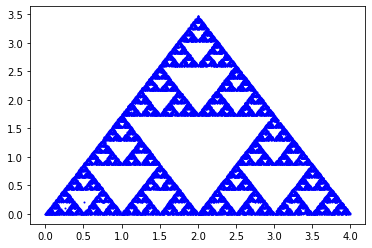

In [19]:
plt.scatter(x, y, color = 'b', s=1)

In [20]:
#Bonus: Try to extend this code to create patterns like these

<img src ='http://math.hws.edu/eck/js/chaos-game/exercises.png'>



# Part 2

In [21]:
# Barnsley's Fern

In [22]:
# 1% of the time:x → 0,y → 0.16 y
# 85% of the time:x → 0.85 x + 0.04 y, y → −0.04 x + 0.05 y + 1.6
# 7% of the time:x → 0.2 x − 0.26 y, y → 0.23 x + 0.22 y + 1.6
# 7% of the time:x → −0.15 x + 0.28 y, y → 0.26 x + 0.24 y + 0.44

In [23]:
def pick(p):
    c = np.cumsum(p)
    return bisect(c, np.random.random() * c[-1]) #matrix is randomly bisected

In [24]:
p = np.array([0.01,0.07,0.07,0.85]) #percentage of the time

In [25]:
eq = [np.array([[0,0,0],[0,0.16,0]]),
      np.array([[0.2,-0.26,0],[0.23,0.22,1.6]]),
      np.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]]),
      np.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])]
      #creates matrix

In [26]:
n = 25000 # Change this value and see what happens. Edge number
x = np.zeros((n,3))
x[:,2] = 1
#changes all 2nd column values to 1 for the nx3 matrix

In [27]:
for i in range(1,n):
    x[i,:2] = np.matmul(eq[pick(p)],x[i-1,:]) #values are multipled and assign the last column of x to the first column of the result.

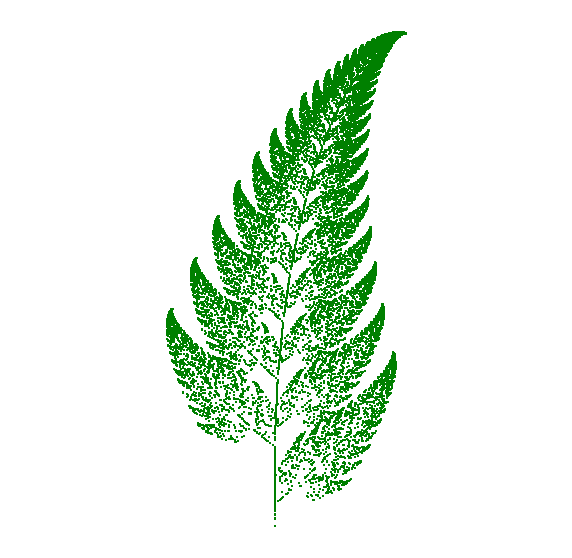

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:, 1], s=3, c="g", marker="s", linewidths=0)
plt.axis("equal"),plt.axis("off"); #plots the fern